In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



In [2]:
df_customer = pd.read_csv('dataset/customers.csv')
df_loan = pd.read_csv('dataset/loans.csv')
df_bureau = pd.read_csv('dataset/bureau_data.csv')

In [3]:
df_customer.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [4]:
df_loan.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [5]:
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [6]:
df = pd.merge(df_loan,df_customer, on='cust_id')

In [7]:
df = pd.merge(df,df_bureau, on='cust_id')
df.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,...,city,state,zipcode,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,...,Delhi,Delhi,110001,1,1,42,0,0,3,7
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,...,Chennai,Tamil Nadu,600001,3,1,96,12,60,5,4
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,...,Kolkata,West Bengal,700001,2,1,82,24,147,6,58
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,...,Bangalore,Karnataka,560001,3,0,115,15,87,5,26
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,...,Pune,Maharashtra,411001,4,2,120,0,0,5,10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_id                      50000 non-null  object 
 1   cust_id                      50000 non-null  object 
 2   loan_purpose                 50000 non-null  object 
 3   loan_type                    50000 non-null  object 
 4   sanction_amount              50000 non-null  int64  
 5   loan_amount                  50000 non-null  int64  
 6   processing_fee               50000 non-null  float64
 7   gst                          50000 non-null  int64  
 8   net_disbursement             50000 non-null  int64  
 9   loan_tenure_months           50000 non-null  int64  
 10  principal_outstanding        50000 non-null  int64  
 11  bank_balance_at_application  50000 non-null  int64  
 12  disbursal_date               50000 non-null  object 
 13  installment_star

In [9]:
df.shape

(50000, 33)

In [10]:
df['default'] = df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [11]:
X = df.drop("default", axis="columns")
y = df['default']

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

df_train = pd.concat([X_train, y_train], axis="columns")
df_test = pd.concat([X_test, y_test], axis="columns")

df_train.head(2)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,...,state,zipcode,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,L12747,C12747,Home,Secured,33121000,23442000,468840.0,4219560,18753600,28,...,Telangana,500001,4,2,152,20,118,4,36,0
32495,L32496,C32496,Education,Secured,1175000,1149000,22980.0,206820,919200,50,...,Maharashtra,400001,3,1,160,10,62,5,5,0


In [12]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [13]:
df_train.isna().sum()

loan_id                         0
cust_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [14]:
mode_residence =df_train['residence_type'].mode()[0]
df_train.isna().sum()

loan_id                         0
cust_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [15]:
df_train.residence_type.fillna(mode_residence,inplace=True)
df_test.residence_type.fillna(mode_residence,inplace=True)



/var/folders/3z/cdhq61mj2k79_p504t1jqryr0000gn/T/ipykernel_990/1879500919.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence,inplace=True)
/var/folders/3z/cdhq61mj2k79_p504t1jqryr0000gn/T/ipykernel_990/1879500919.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [16]:
df_train.duplicated().sum()
df_train.describe()

,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,age,income,...,years_at_current_address,zipcode,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
count,3.750000e+04,3.750000e+04,3.750000e+04,3.750000e+04,3.750000e+04,37500.000000,3.750000e+04,3.750000e+04,37500.000000,3.750000e+04,...,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000
mean,4.699692e+06,3.996068e+06,8.029068e+04,7.192922e+05,3.196854e+06,25.961040,1.333820e+06,9.862989e+05,39.540587,2.633326e+06,...,15.997787,418866.253333,2.502907,1.001120,76.11104,4.844853,26.672613,5.008533,43.424880,0.085947
std,6.257833e+06,5.371862e+06,1.131281e+05,9.669352e+05,4.297490e+06,12.447444,1.213674e+06,1.043145e+06,9.858344,2.623781e+06,...,8.921041,169035.021773,1.119070,0.814021,43.76852,5.841396,32.779424,2.029236,29.392857,0.280289
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,-1.000000e+00,0.000000e+00,18.000000,0.000000e+00,...,1.000000,110001.000000,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.142000e+06,9.610000e+05,1.922000e+04,1.729800e+05,7.688000e+05,16.000000,4.221975e+05,2.870402e+05,33.000000,8.020000e+05,...,8.000000,302001.000000,1.000000,0.000000,42.00000,0.000000,0.000000,4.000000,18.000000,0.000000
50%,2.644000e+06,2.230000e+06,4.460000e+04,4.014000e+05,1.784000e+06,24.000000,9.974275e+05,6.650145e+05,39.000000,1.885000e+06,...,16.000000,400001.000000,3.000000,1.000000,71.00000,3.000000,13.000000,5.000000,39.000000,0.000000
75%,5.178000e+06,4.619000e+06,9.242000e+04,8.314200e+05,3.695200e+06,35.000000,1.784879e+06,1.234063e+06,46.000000,3.326250e+06,...,24.000000,560001.000000,4.000000,2.000000,107.00000,8.000000,46.000000,6.000000,67.000000,0.000000
max,5.217500e+07,4.781900e+07,5.293544e+06,8.607420e+06,3.825520e+07,59.000000,5.000000e+06,7.846643e+06,70.000000,1.199900e+07,...,31.000000,700001.000000,4.000000,2.000000,223.00000,24.000000,171.000000,9.000000,99.000000,1.000000


In [17]:
df_train.columns

Index(['loan_id', 'cust_id', 'loan_purpose', 'loan_type', 'sanction_amount',
       'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [18]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address',
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city',
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

In [19]:
df_train.columns[df_train.columns.str.contains("account|loan|dpd|delinq", case=False)]


Index(['loan_id', 'loan_purpose', 'loan_type', 'loan_amount',
       'loan_tenure_months', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd'],
      dtype='object')

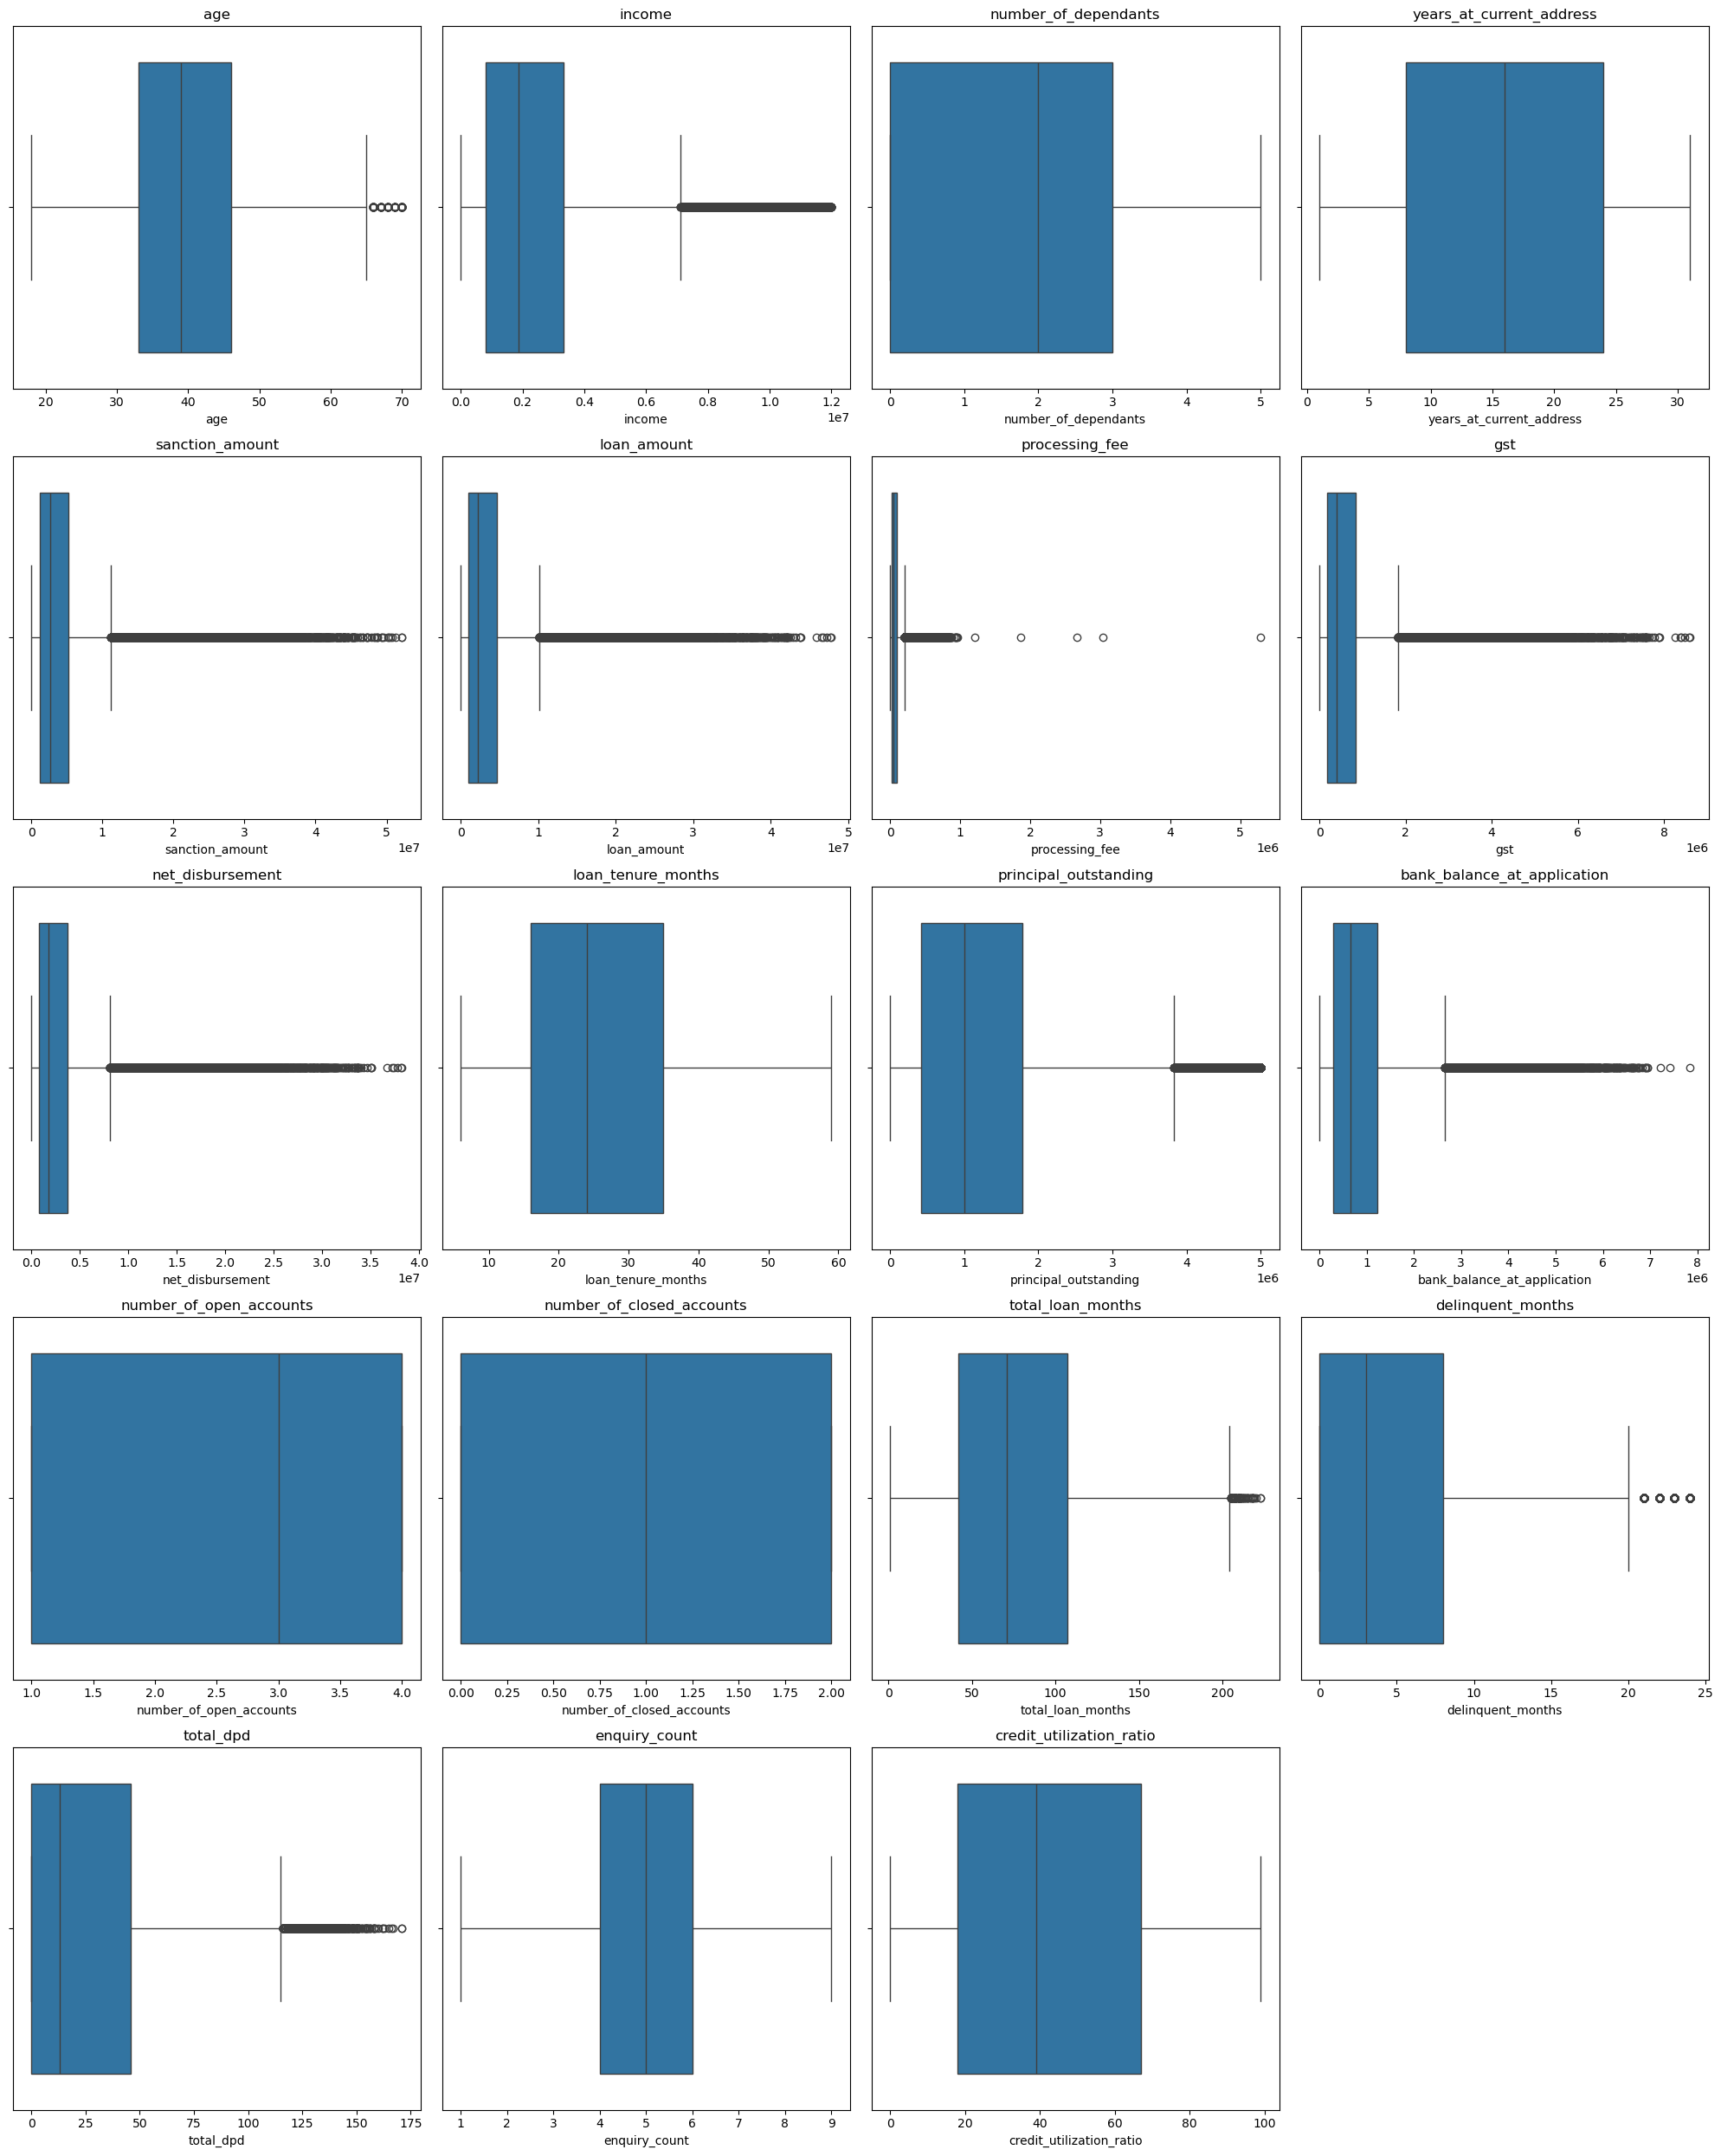

In [20]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

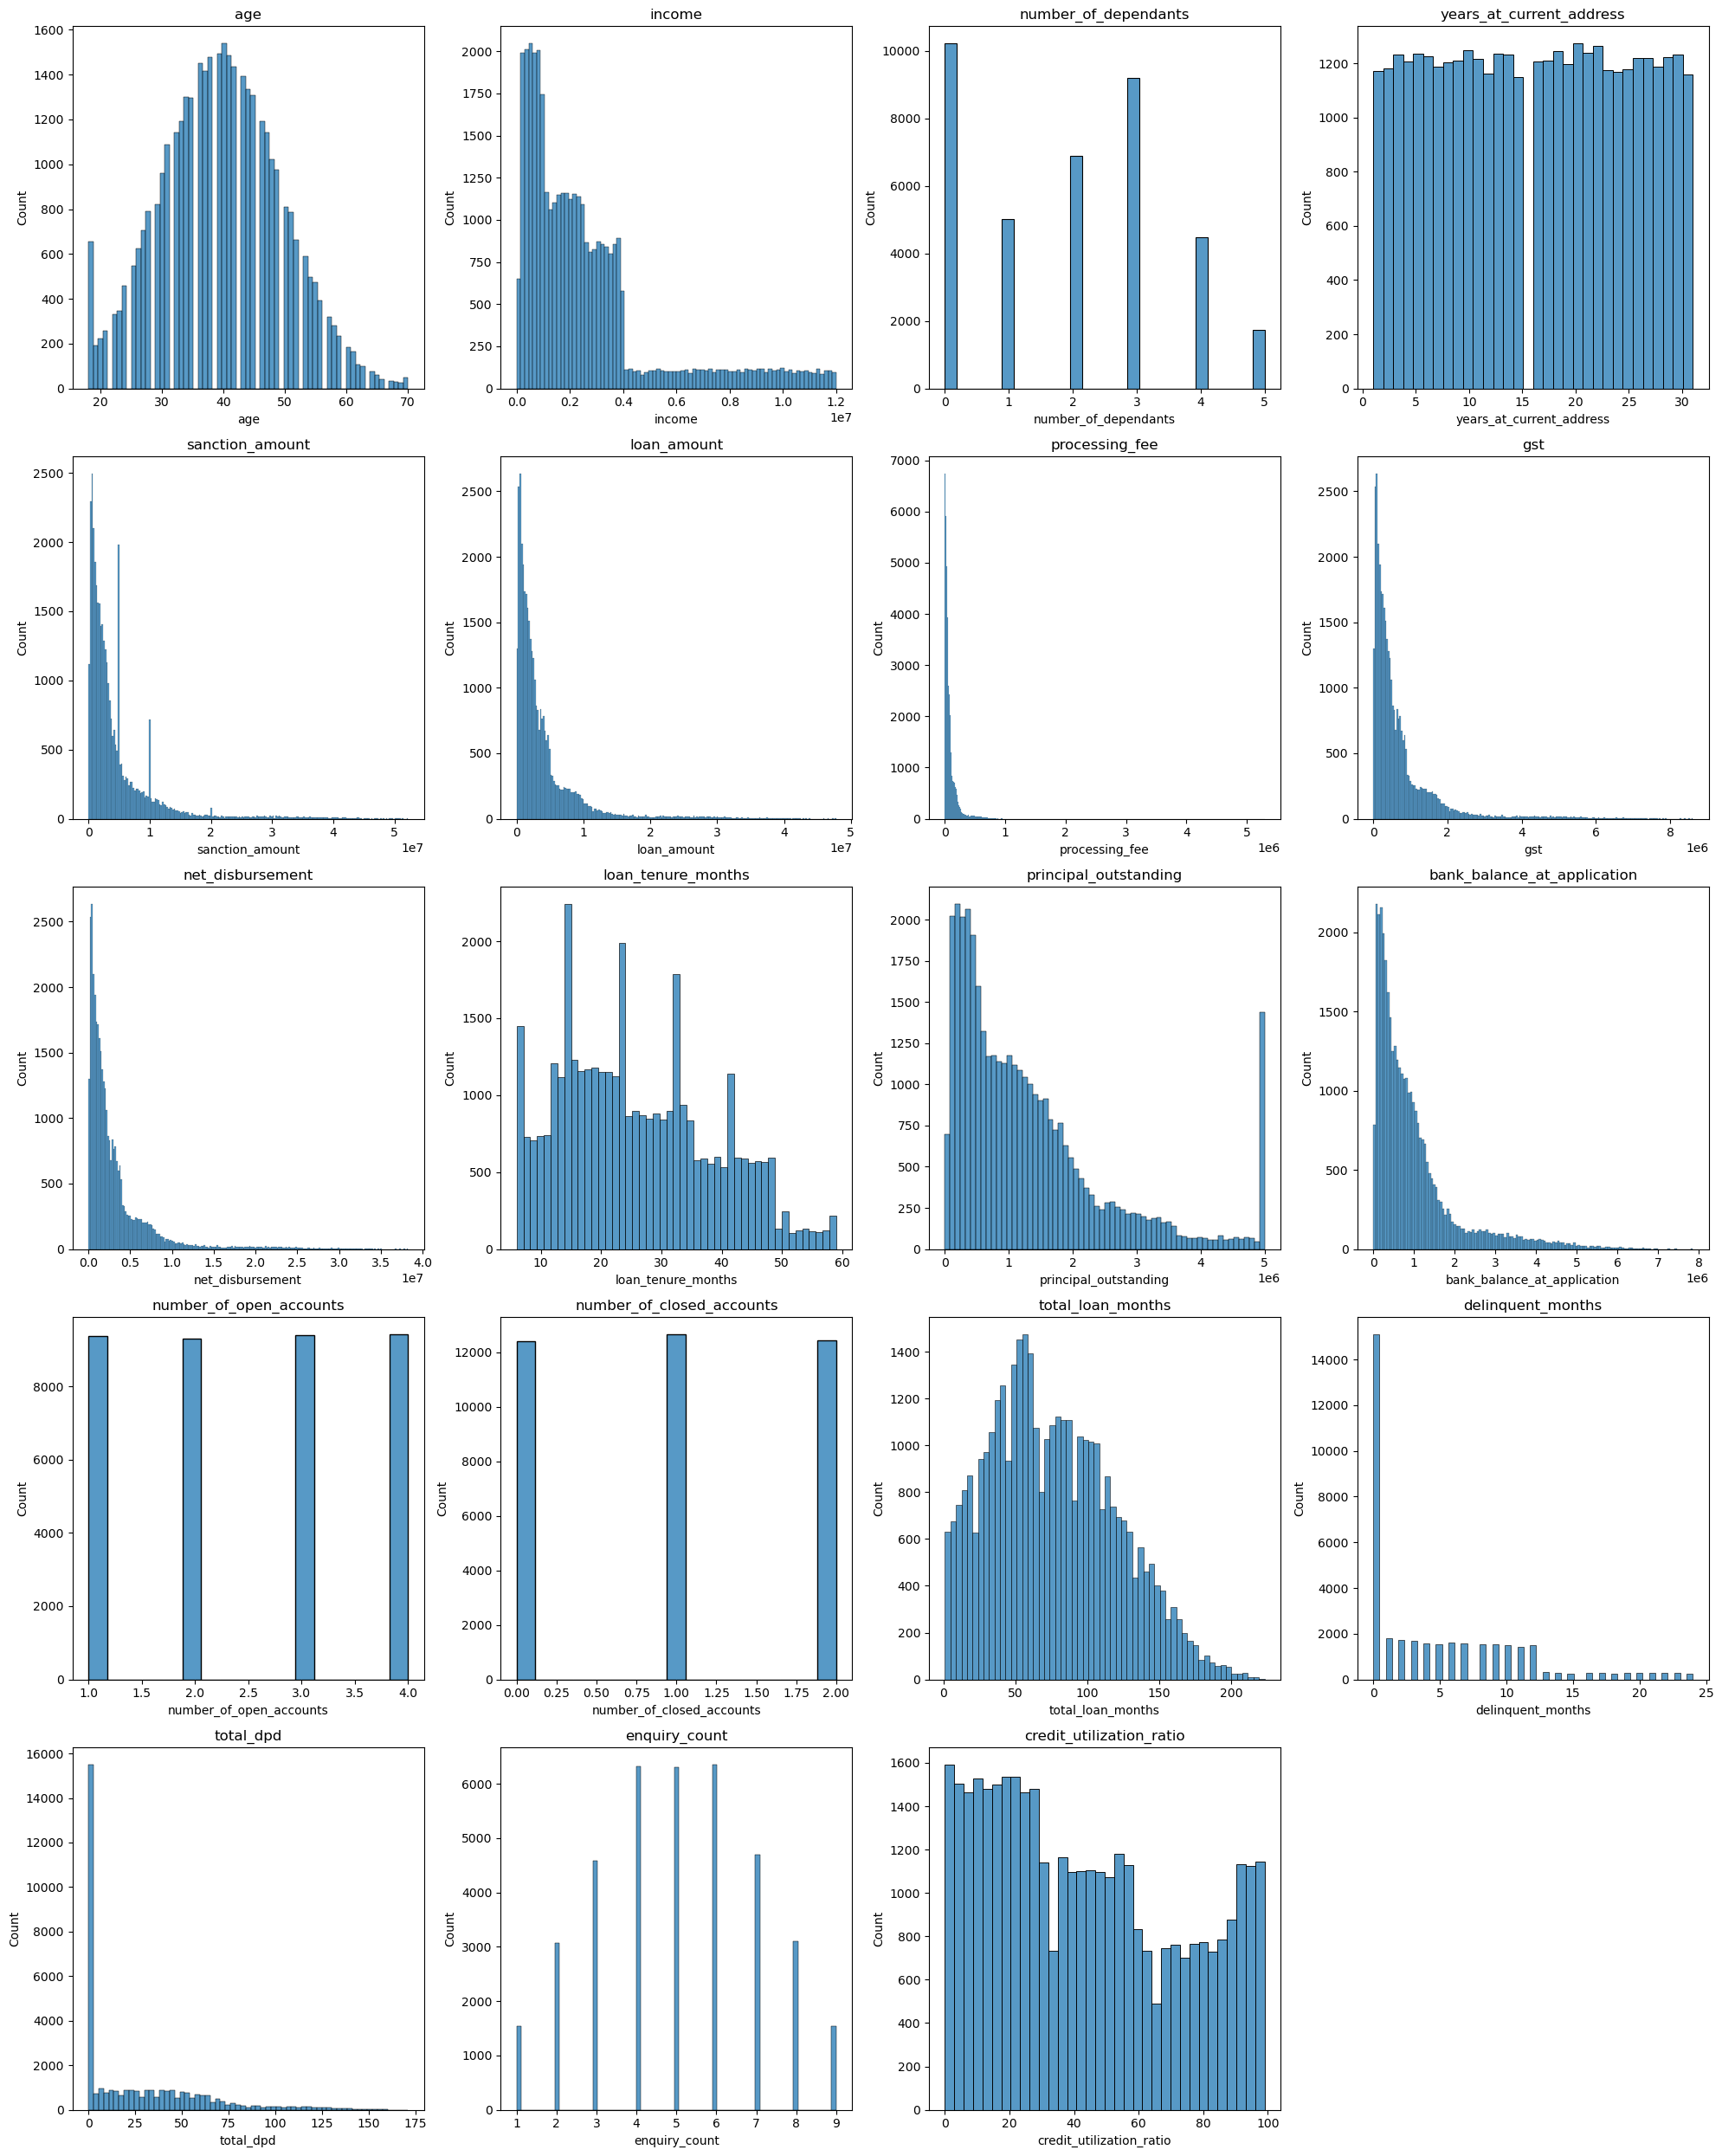

In [21]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.histplot(df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [22]:
df_train.processing_fee.describe()

count    3.750000e+04
mean     8.029068e+04
std      1.131281e+05
min      0.000000e+00
25%      1.922000e+04
50%      4.460000e+04
75%      9.242000e+04
max      5.293544e+06
Name: processing_fee, dtype: float64

In [23]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2.669791e+06
28174,966000,1.214493e+06
47089,1738000,1.858965e+06
29305,2616000,3.036378e+06
9898,3626000,5.293544e+06


In [24]:
df_train1 = df_train[df_train.processing_fee/df_train.loan_amount<0.03].copy()


In [25]:
df_test.residence_type.isna().sum()

np.int64(0)

In [26]:
df_test = df_test[df_test.processing_fee/df_test.loan_amount<0.03].copy()
df_test.shape


(12497, 33)

In [27]:
df_train1[(df_train1.gst/df_train1.loan_amount)>0.2].shape

(0, 33)

In [28]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [29]:
for col in columns_categorical:
    print(col," -->",df_train1[col].unique())

gender  --> ['M' 'F']
marital_status  --> ['Married' 'Single']
employment_status  --> ['Self-Employed' 'Salaried']
residence_type  --> ['Owned' 'Mortgage' 'Rented']
city  --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state  --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode  --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose  --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type  --> ['Secured' 'Unsecured']
default  --> [0 1]


In [30]:
df_train1['loan_purpose'] = df_train1.loan_purpose.replace({'Personaal':'Personal'})
df_train1.loan_purpose.unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

In [31]:
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal', 'Personal')
df_test['loan_purpose'].unique()

array(['Home', 'Education', 'Auto', 'Personal'], dtype=object)

In [32]:
df_train1.groupby("default")['age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,34265.0,39.767693,9.880235,18.0,33.0,40.0,46.0,70.0
1,3223.0,37.124729,9.290168,18.0,31.0,37.0,44.0,70.0


**Insights**

1. Average age in the default group is little less (37.12) than the average (39.7) of the group that did not default
1. Variability (standard deviation) is mostly similar in both the groups
1. Both the groups have similar min and max ages

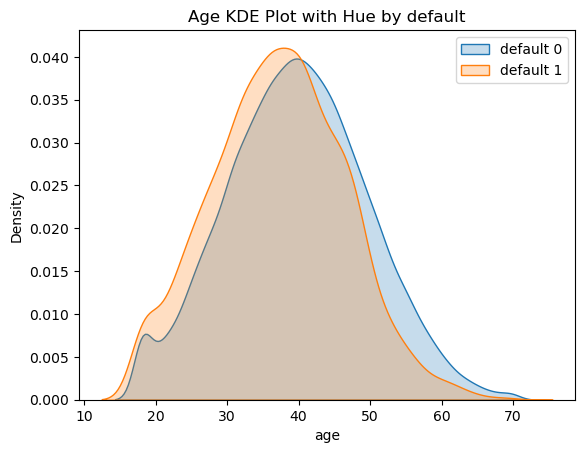

In [33]:
plt.Figure(figsize=(8,6))

sns.kdeplot(x=df_train1['age'][df_train1['default'] == 0 ], fill=True,label='default 0')
sns.kdeplot(x=df_train1['age'][df_train1['default'] == 1], fill=True,label='default 1')
plt.title(f"Age KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**

1. Orange (defaulted) group is slightly shifted to left indicating that younger folks are more likely to default on their loans

### KDE for all the Columns

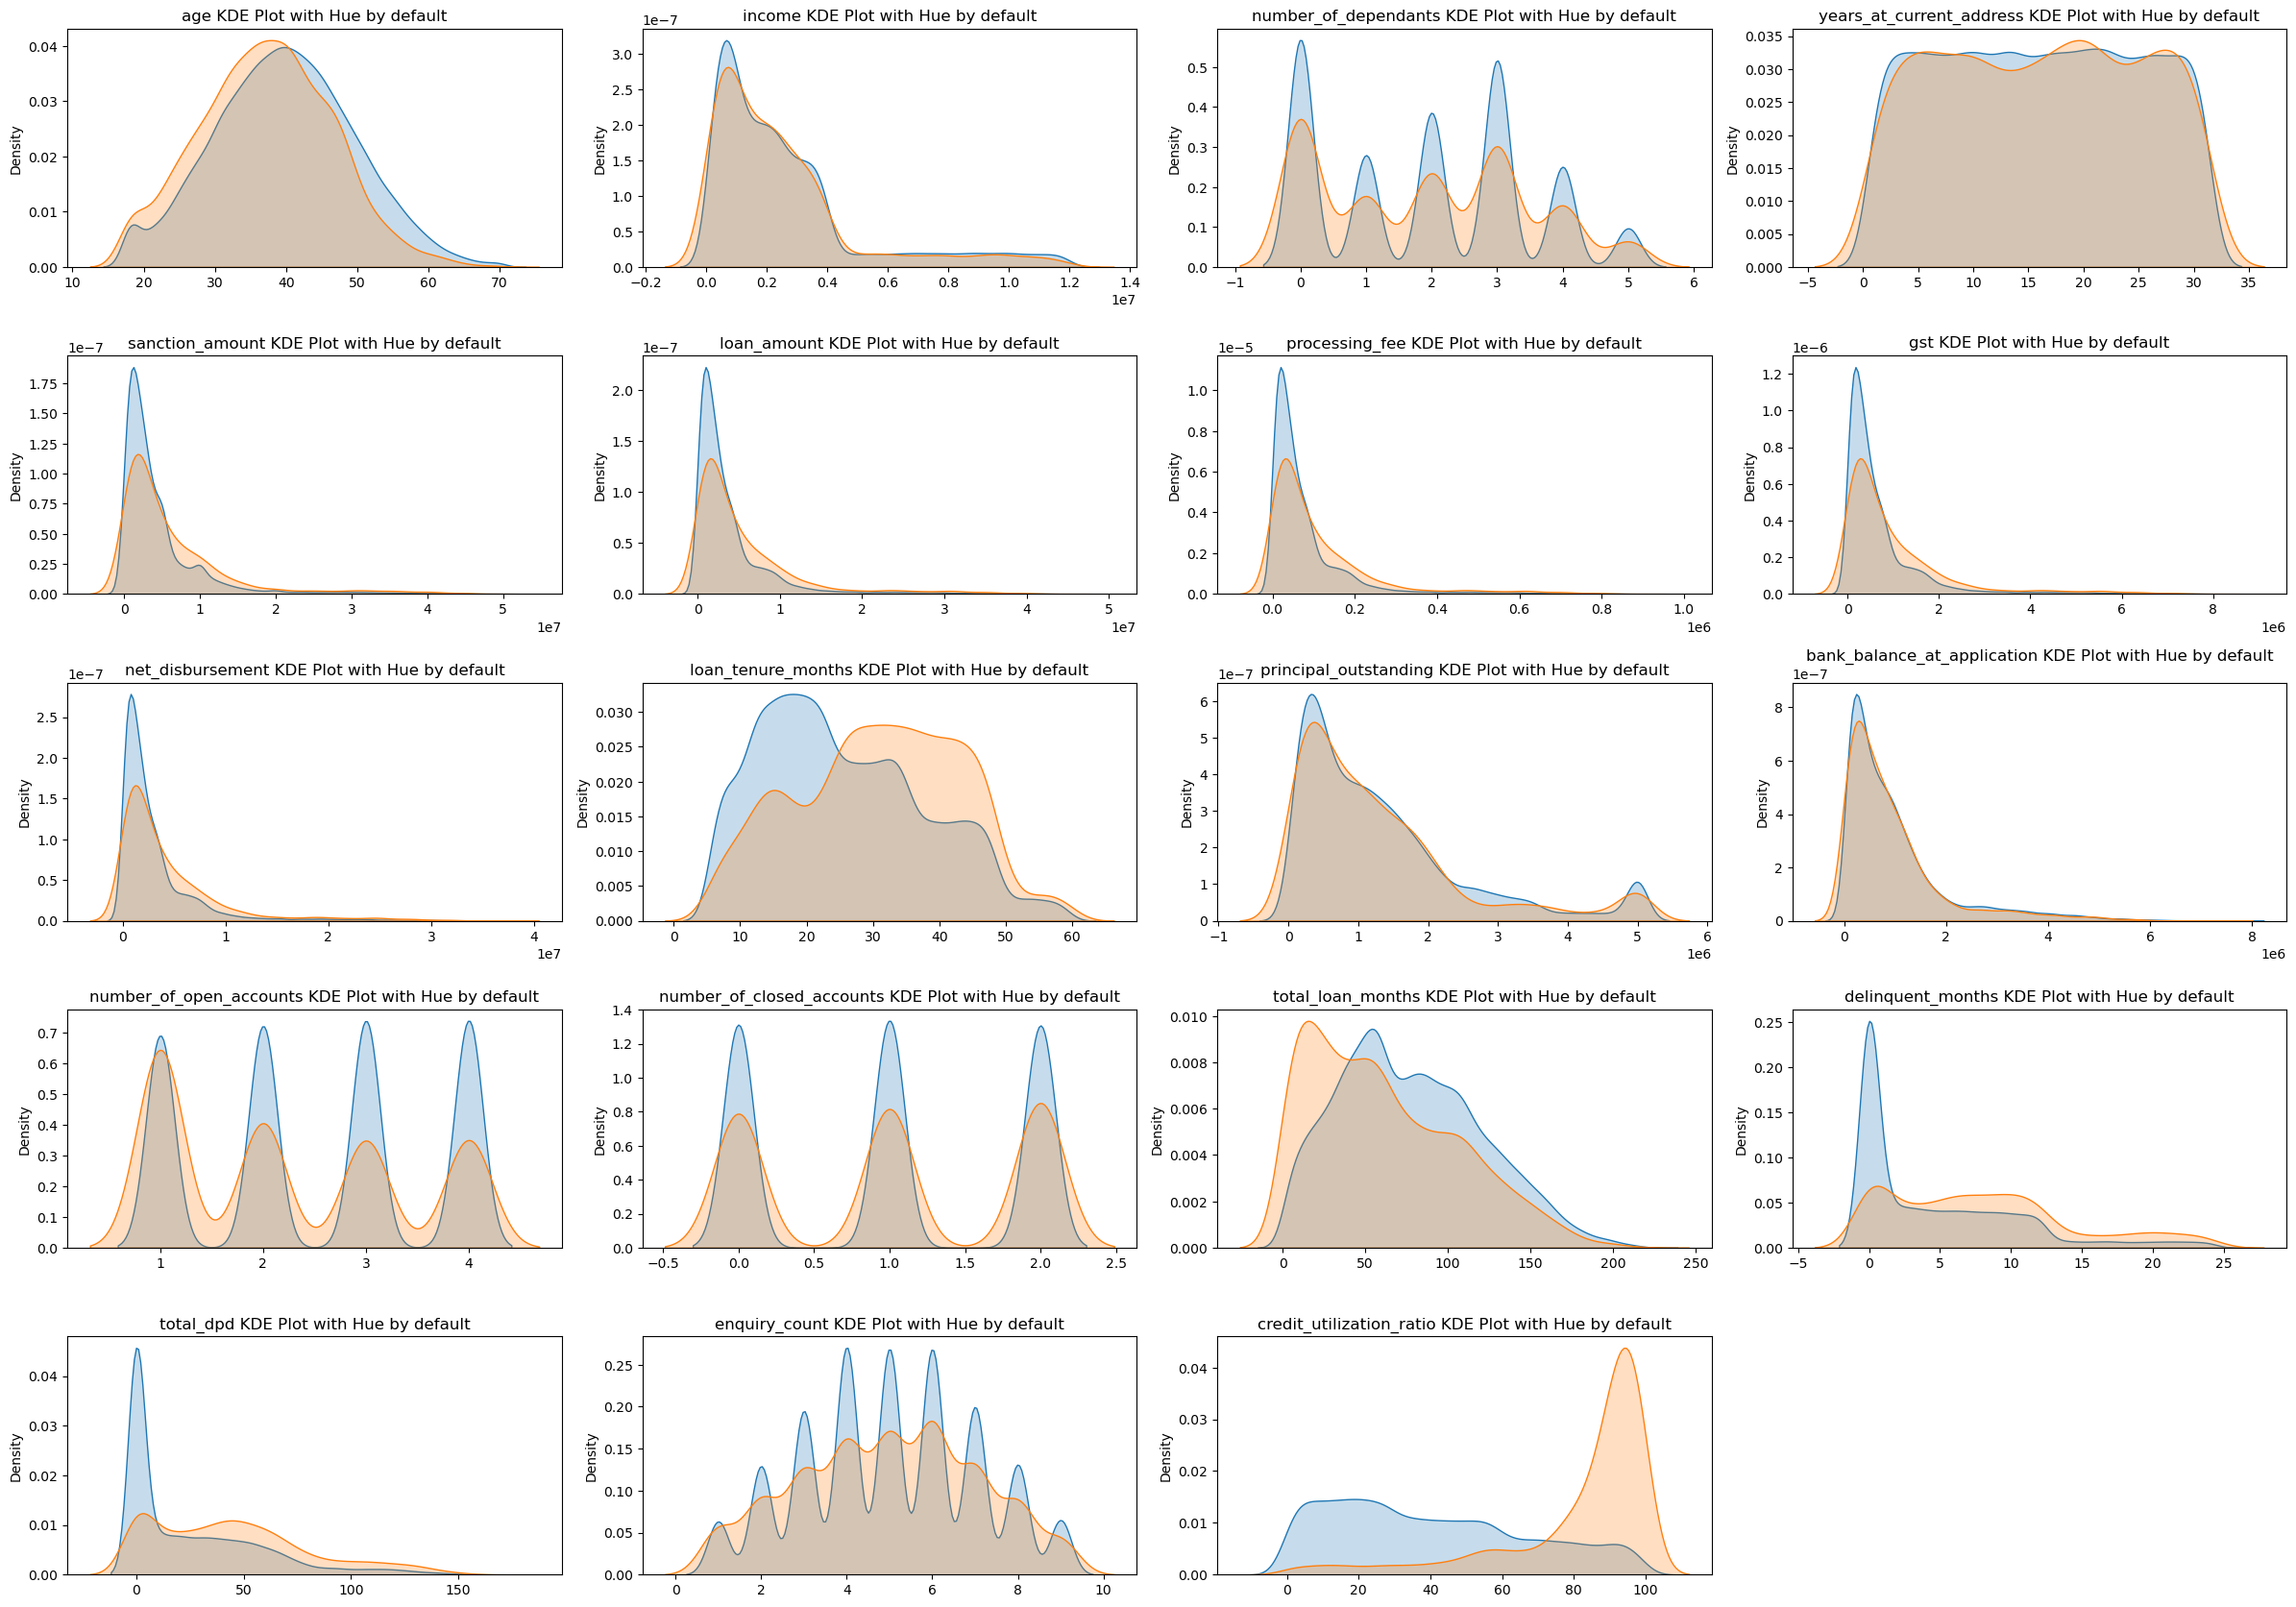

In [34]:
plt.figure(figsize=(24,20))
for i , col in enumerate(columns_continuous):
    plt.subplot(6,4,i+1)
    sns.kdeplot(df_train1[col][df_train1['default'] == 0 ], fill=True,label='default 0')
    sns.kdeplot(df_train1[col][df_train1['default'] == 1], fill=True,label='default 1')
    plt.title(f"{col} KDE Plot with Hue by default")
    plt.xlabel('')
plt.tight_layout()
plt.show()

**Insights**

1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
1. In remaining columns the distributions do not give any obvious insights
1. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later

#### Generate Loan to Income (LTI) Ratio

In [35]:
df_train1[['loan_amount','income']].head(3)

,loan_amount,income
12746,23442000,11327000
32495,1149000,715000
43675,11296000,3195000


In [36]:
df_train1['loan_to_income']= round(df_train1['loan_amount']/df_train1['income'],2)
df_train1.loan_to_income.describe()

count    37488.000000
mean         1.556711
std          0.973687
min          0.300000
25%          0.770000
50%          1.160000
75%          2.460000
max          4.570000
Name: loan_to_income, dtype: float64

In [37]:
df_test['loan_to_income'] = round(df_test['loan_amount'] / df_test['income'],2)
df_test.loan_to_income.describe()

count    12497.000000
mean         1.551274
std          0.965773
min          0.300000
25%          0.780000
50%          1.160000
75%          2.430000
max          4.590000
Name: loan_to_income, dtype: float64

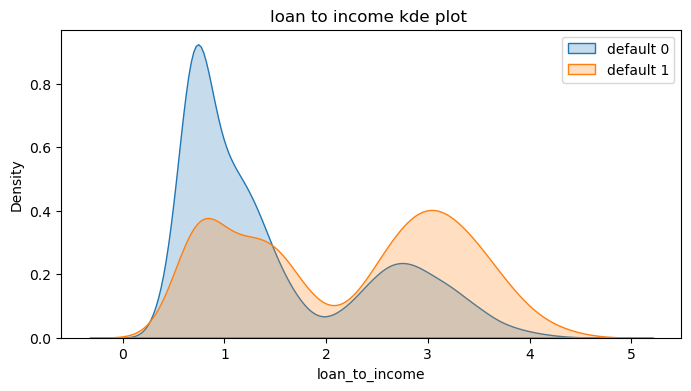

In [38]:
plt.figure(figsize=(8,4))
sns.kdeplot(df_train1[df_train1['default'] ==  0]['loan_to_income'], fill=True, label='default 0')
sns.kdeplot(df_train1[df_train1['default'] ==  1]['loan_to_income'], fill=True, label='default 1')
plt.title("loan to income kde plot ")
plt.legend()
plt.show()




**Insights**
1. Blue graph has majority of its values on lower side of LTI
2. Orange graph has many values when LTI is higher indicating that higher LTI means high risk loan

#### Generate Delinquency Ratio

In [39]:
df_train1['delinquency_ratio'] = (df_train1['delinquent_months']*100 / df_train1['total_loan_months']).round(1)
df_test['delinquency_ratio'] = (df_test['delinquent_months']*100 / df_test['total_loan_months']).round(1)

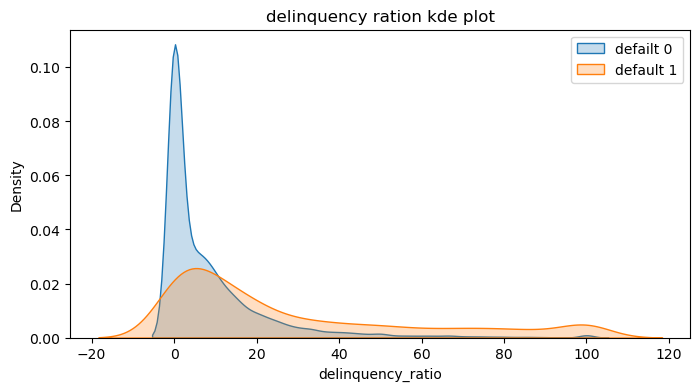

In [40]:
plt.figure(figsize=(8,4))
sns.kdeplot(df_train1['delinquency_ratio'][df_train1['default']==0],fill=True,label='defailt 0')
sns.kdeplot(df_train1['delinquency_ratio'][df_train1['default']==1],fill=True,label='default 1')
plt.title('delinquency ration kde plot')
plt.legend()
plt.show()

#### Generate Avg DPD Per Delinquency

**Insights**
1. Blue graph has majority of its values on lower side of LTI
2. Orange graph has many values when delinquency ratio is higher indicating some correlation on default

In [41]:
df_train1.columns

Index(['loan_id', 'cust_id', 'loan_purpose', 'loan_type', 'sanction_amount',
       'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio'],
      dtype='object')

In [42]:
df_test.columns

Index(['loan_id', 'cust_id', 'loan_purpose', 'loan_type', 'sanction_amount',
       'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio'],
      dtype='object')

In [43]:
df_train1['avg_dpd_per_delinquency'] = np.where(
    df_train1['delinquent_months'] != 0,
    (df_train1['total_dpd']/df_train1['delinquent_months']).round(1),
    0
)
df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd']/df_test['delinquent_months']).round(1),
    0
)

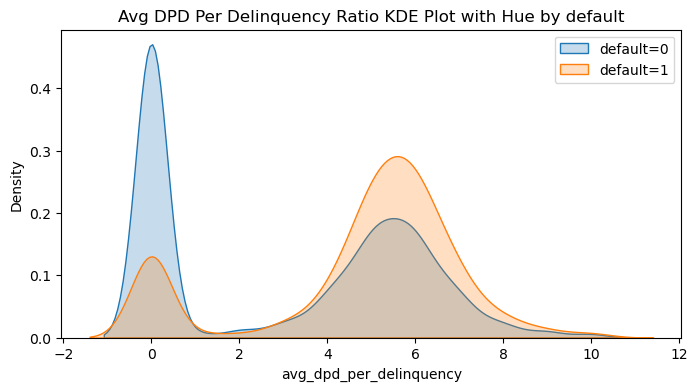

In [44]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train1['avg_dpd_per_delinquency'][df_train1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train1['avg_dpd_per_delinquency'][df_train1['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**

1. Graph clearly shows more occurances of default cases when avg_dpd_per_delinquency is high. This means this column is a strong predictor

#### Generate Credit Utilization Per LTI

In [45]:
df_test.columns

Index(['loan_id', 'cust_id', 'loan_purpose', 'loan_type', 'sanction_amount',
       'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [46]:
df_train1['credit_utilization_per_income'] = np.where(
    df_train1['loan_to_income'] != 0,
    (df_train1['credit_utilization_ratio'] / df_train1['loan_to_income']).round(1),
    0
)

df_test['credit_utilization_per_income'] = np.where(
    df_test['loan_to_income'] != 0,
    (df_test['credit_utilization_ratio'] / df_test['loan_to_income']).round(1),
    0
)

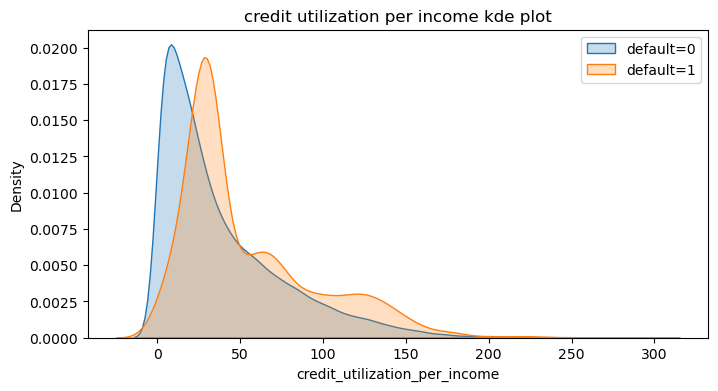

In [47]:
plt.figure(figsize=(8,4))
sns.kdeplot(df_train1['credit_utilization_per_income'][df_train1['default']==0], fill=True,label='default=0')
sns.kdeplot(df_train1['credit_utilization_per_income'][df_train1['default']==1], fill=True,label='default=1')
plt.title('credit utilization per income kde plot')
plt.legend()
plt.show()

Graph clearly shows more occurrences of default cases when the Credit Utilization Per Income Ratio is high. This indicates that this column is a strong predictor of default risk.

### Remove columns that are just unique ids and don't have influence on target

In [48]:
df_train1.columns

Index(['loan_id', 'cust_id', 'loan_purpose', 'loan_type', 'sanction_amount',
       'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'disbursal_date', 'installment_start_dt',
       'age', 'gender', 'marital_status', 'employment_status', 'income',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency',
       'credit_utilization_per_income'],
      dtype='object')

In [49]:
df_train_2 = df_train1.drop(['cust_id', 'loan_id'], axis="columns")
df_test = df_test.drop(['cust_id', 'loan_id'], axis="columns")

### Remove columns that business contact person asked us to remove

In [50]:
df_train_2.columns

Index(['loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'age', 'gender',
       'marital_status', 'employment_status', 'income', 'number_of_dependants',
       'residence_type', 'years_at_current_address', 'city', 'state',
       'zipcode', 'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency',
       'credit_utilization_per_income'],
      dtype='object')

In [51]:

TARGET_COLUMNS = [
    'age', 'gender', 'marital_status', 'employment_status',
    'number_of_dependants', 'residence_type', 'years_at_current_address',
    'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
    'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
    'loan_tenure_months', 'principal_outstanding',
    'bank_balance_at_application', 'number_of_open_accounts',
    'number_of_closed_accounts', 'enquiry_count',
    'credit_utilization_ratio', 'default', 'loan_to_income',
    'delinquency_ratio', 'avg_dpd_per_delinquency',
    'credit_utilization_per_income'
]

df_train_3 = df_train_2[TARGET_COLUMNS]
df_test = df_test[TARGET_COLUMNS]

In [52]:

df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency',
       'credit_utilization_per_income'],
      dtype='object')

In [53]:
df_train_3.select_dtypes(['int64', 'float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency',
       'credit_utilization_per_income'],
      dtype='object')

### VIF to measure multicolinearity

In [54]:


X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = X_train.select_dtypes(['int64', 'float64']).columns
print(cols_to_scale)
scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'credit_utilization_per_income'],
      dtype='object')


,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,credit_utilization_per_income
count,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.00000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000
mean,0.414240,0.388903,0.499918,0.523517,0.088840,0.082513,0.082513,0.082513,0.376631,0.261615,0.123550,0.500925,0.50056,0.501077,0.438653,0.294312,0.103299,0.328391,0.138187
std,0.189590,0.307182,0.297364,0.286491,0.120117,0.112480,0.112480,0.112480,0.234860,0.244461,0.133275,0.373040,0.40701,0.253666,0.296902,0.228030,0.172985,0.290663,0.132257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.020555,0.018963,0.018963,0.018963,0.188679,0.077988,0.034205,0.000000,0.00000,0.375000,0.181818,0.110070,0.000000,0.000000,0.040522
50%,0.403846,0.400000,0.500000,0.491525,0.049364,0.045516,0.045516,0.045516,0.339623,0.193870,0.082515,0.666667,0.50000,0.500000,0.393939,0.201405,0.037000,0.430000,0.094780
75%,0.538462,0.600000,0.766667,0.762712,0.098027,0.095555,0.095555,0.095555,0.547170,0.352418,0.155192,1.000000,1.00000,0.625000,0.676768,0.505855,0.129000,0.572500,0.199863
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()


,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,credit_utilization_per_income
count,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000
mean,0.415001,0.384892,0.502697,0.525015,0.089218,0.082800,0.082800,0.082800,0.375092,0.264632,0.124944,0.497293,0.500440,0.501470,0.436038,0.293038,0.106074,0.333844,0.136872
std,0.188773,0.306871,0.298103,0.286179,0.120844,0.112877,0.112877,0.112877,0.233792,0.245290,0.134708,0.372576,0.407226,0.253618,0.295418,0.226176,0.173081,0.289680,0.130682
min,0.000000,0.000000,0.000000,0.000000,-0.000019,-0.000126,-0.000126,-0.000126,0.000000,0.000163,0.000668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.020958,0.019387,0.019387,0.019387,0.188679,0.079715,0.034167,0.000000,0.000000,0.375000,0.181818,0.112412,0.000000,0.000000,0.040522
50%,0.423077,0.400000,0.500000,0.510169,0.050189,0.046249,0.046249,0.046249,0.339623,0.198239,0.084024,0.333333,0.500000,0.500000,0.393939,0.201405,0.042000,0.440000,0.093407
75%,0.538462,0.600000,0.766667,0.762712,0.097422,0.094927,0.094927,0.094927,0.547170,0.356914,0.157792,0.666667,1.000000,0.625000,0.676768,0.498829,0.134000,0.580000,0.198832
max,1.000000,1.000000,1.000000,1.000000,0.981249,0.963717,0.963717,0.963717,1.000000,1.000000,0.939154,1.000000,1.000000,1.000000,1.000000,1.004684,1.000000,1.000000,0.961538


In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [57]:
X_train.head(2)

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,credit_utilization_per_income
12746,0.788462,M,Married,Self-Employed,0.6,Owned,0.966667,Hyderabad,Telangana,0.661017,...,1.00000,0.613386,1.000000,1.0,0.375,0.363636,0.414520,0.132,0.59,0.059753
32495,0.500000,F,Single,Salaried,0.0,Owned,0.866667,Mumbai,Maharashtra,0.491525,...,0.08702,0.025205,0.666667,0.5,0.500,0.050505,0.306792,0.062,0.62,0.010646


In [58]:
vif_df = calculate_vif(X_train[cols_to_scale])
vif_df

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.930004
1,number_of_dependants,2.731496
2,years_at_current_address,3.444771
3,zipcode,3.826306
4,sanction_amount,101.155628
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.350642
9,principal_outstanding,16.665142


In [59]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']


X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'credit_utilization_per_income'],
      dtype='object')

In [60]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.608209
1,number_of_dependants,2.728223
2,years_at_current_address,3.430358
3,zipcode,3.810344
4,loan_tenure_months,6.210106
5,bank_balance_at_application,1.890741
6,number_of_open_accounts,4.354805
7,number_of_closed_accounts,2.380991
8,enquiry_count,6.422011
9,credit_utilization_ratio,10.126439


 All though credit_utilization_ratio has high VIF, we will not drop it since business team has insisted to not drop this important feature

In [61]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency',
       'credit_utilization_per_income'], dtype=object)

In [62]:
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'credit_utilization_per_income'],
      dtype='object')

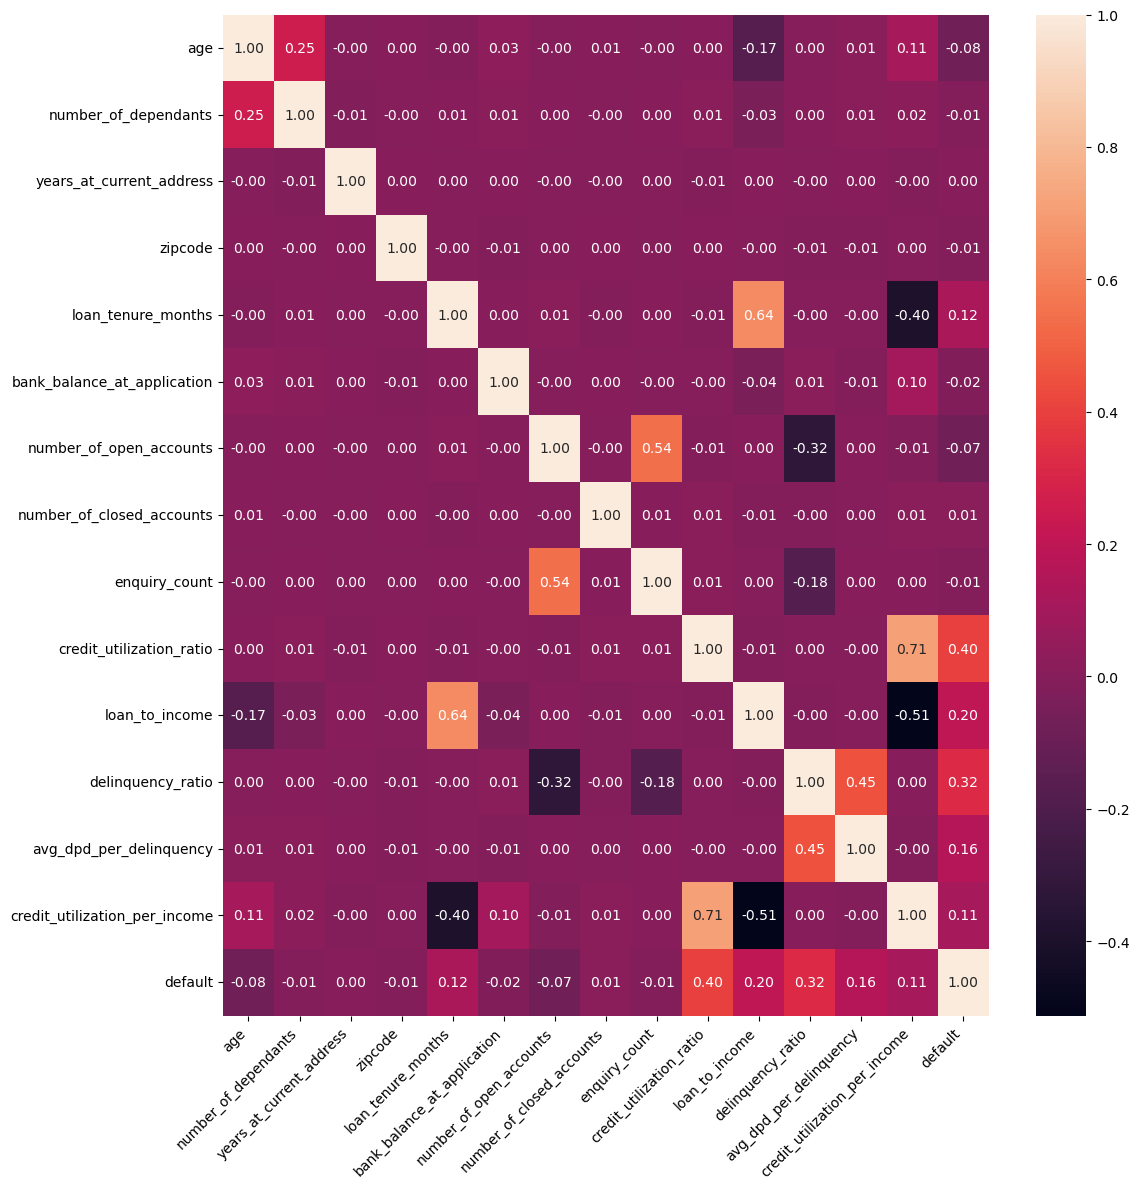

In [63]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm,annot=True, fmt="0.2f")
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [64]:
X_train_1.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,credit_utilization_per_income
12746,0.788462,M,Married,Self-Employed,0.6,Owned,0.966667,Hyderabad,Telangana,0.661017,...,0.415094,0.613386,1.000000,1.0,0.375,0.363636,0.414520,0.132,0.59,0.059753
32495,0.500000,F,Single,Salaried,0.0,Owned,0.866667,Mumbai,Maharashtra,0.491525,...,0.830189,0.025205,0.666667,0.5,0.500,0.050505,0.306792,0.062,0.62,0.010646
43675,0.384615,M,Single,Salaried,0.0,Mortgage,0.833333,Chennai,Tamil Nadu,0.830508,...,0.490566,0.174318,0.000000,0.5,0.375,0.000000,0.758782,0.222,0.56,0.000000
9040,0.461538,M,Married,Salaried,0.4,Mortgage,0.966667,Bangalore,Karnataka,0.762712,...,0.641509,0.077523,0.666667,0.0,0.875,0.878788,0.194379,0.000,0.00,0.264423
13077,0.769231,M,Married,Self-Employed,0.8,Owned,0.933333,Pune,Maharashtra,0.510169,...,0.169811,0.072271,0.000000,1.0,0.000,0.717172,0.046838,0.000,0.00,0.487637


### Calculate WOE and IV

In [65]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']

    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()

    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']

    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)

    total_iv = grouped['iv'].sum()

    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.101458,0.207792,-0.716891,0.076230
Education,5620,559,5061,0.173441,0.147702,0.160642,0.004135
Home,11304,1734,9570,0.538008,0.279294,0.655609,0.169616
Personal,13117,603,12514,0.187093,0.365212,-0.668874,0.119140


In [66]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            37488 non-null  float64
 1   gender                         37488 non-null  object 
 2   marital_status                 37488 non-null  object 
 3   employment_status              37488 non-null  object 
 4   number_of_dependants           37488 non-null  float64
 5   residence_type                 37488 non-null  object 
 6   years_at_current_address       37488 non-null  float64
 7   city                           37488 non-null  object 
 8   state                          37488 non-null  object 
 9   zipcode                        37488 non-null  float64
 10  loan_purpose                   37488 non-null  object 
 11  loan_type                      37488 non-null  object 
 12  loan_tenure_months             37488 non-null  

In [67]:
iv_values={}
for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv  = calculate_woe_iv(pd.concat([X_train_1,y_train],axis=1), feature,'default')
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned,y_train], axis=1), feature,'default')
    iv_values[feature] = iv
iv_values

{'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.0019380899135053508),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'zipcode': np.float64(0.0016677413243392572),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'number_of_open_accounts': np.float64(0.08463134083005877),
 'number_of_closed_accounts': np.float64(0.0011964272592421567),
 'enquiry_count': np.float64(0.007864214085342608),
 'credit_utilization_ratio': np.float64(2.352965568168245),
 'loan_to_income': np.float64(0.47641

In [68]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
iv_df = pd.DataFrame(iv_values.items(), columns=['Feature', 'IV'])
iv_df.sort_values(by='IV', ascending=False)

,Feature,IV
17,credit_utilization_ratio,2.353
19,delinquency_ratio,0.717
18,loan_to_income,0.476
20,avg_dpd_per_delinquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
21,credit_utilization_per_income,0.196
11,loan_type,0.163
0,age,0.089


In [69]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature,iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency',
 'credit_utilization_per_income']

In [70]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [71]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,credit_utilization_per_income,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.132,0.590,0.060,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.051,0.307,0.062,0.620,0.011,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.000,0.759,0.222,0.560,0.000,False,False,False,True,False,False
9040,0.462,0.642,0.667,0.879,0.194,0.000,0.000,0.264,False,False,True,False,False,False
13077,0.769,0.170,0.000,0.717,0.047,0.000,0.000,0.488,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,1.000,0.113,0.333,0.131,0.063,0.000,0.000,0.078,True,False,False,False,True,True
5558,0.404,0.491,0.000,0.444,0.190,0.269,0.510,0.136,False,True,False,False,False,False
45236,0.404,0.604,1.000,0.980,0.719,0.085,0.400,0.099,True,False,False,True,False,False
49228,0.288,0.585,0.333,0.253,0.276,0.000,0.000,0.058,True,False,True,False,False,False


In [72]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,credit_utilization_per_income,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.550,0.000,0.000,0.127,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.220,0.000,0.000,0.089,True,False,True,False,False,False
30367,0.231,0.547,0.667,0.828,0.180,0.000,0.000,0.263,True,False,False,False,False,False
35347,0.365,0.755,1.000,0.485,0.571,0.024,0.700,0.060,True,False,False,True,False,False
41814,0.577,0.717,0.667,0.980,0.407,0.107,0.640,0.163,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29297,0.173,0.434,0.667,0.525,0.251,0.048,0.280,0.130,True,False,False,False,False,False
20567,0.423,0.547,0.000,0.051,0.672,0.000,0.000,0.005,False,True,False,True,False,False
681,0.192,0.170,0.333,0.545,0.002,0.062,0.350,0.598,False,True,False,False,True,True
33682,0.250,0.585,0.000,0.859,0.785,0.000,0.000,0.080,True,False,False,True,False,False


<h3 align="center" style="color:blue">Model Training</h3>

### Attempt 1

1. Logistic Regression, RandomForest & XGB
1. No handling of class imbalance

In [73]:
model = LogisticRegression()
model.fit(X_train_encoded,y_train)
y_pred = model.predict(X_test_encoded)

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



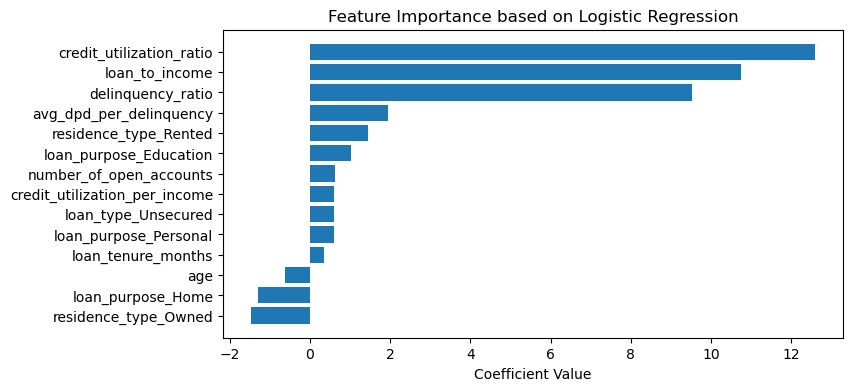

In [74]:
feature_importance = model.coef_[0]
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)
plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance based on Logistic Regression')
plt.show()



In [75]:
model = RandomForestClassifier()
model.fit(X_train_encoded,y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.71      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [76]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_encoded,y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.81      0.75      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.89      0.87      0.88     12497
weighted avg       0.96      0.96      0.96     12497



Since there is not much difference between XGB and Logistic, we will choose LogisticRegression as a candidate for our RandomizedSearchCV candidate it has a better interpretation.

In [77]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ............C=0.08858667904100823, solver=liblinear; total time=   0.1s
[CV] END ............C=0.08858667904100823, solver=liblinear; total time=   0.0s
[CV] END .............................C=0.0001, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END .............................C=0.0001, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=newton-cg; total time=   0.0s
[CV] END .............................C=0.0001, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.004832930238571752, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=newton-cg; total time=   0.1s
[CV] END ............C=0.08858667904100823, sol

In [78]:
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}
xgb = XGBClassifier()
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1

)
random_search.fit(X_train_encoded, y_train)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     11423
           1       0.77      0.85      0.81      1074

    accuracy                           0.97     12497
   macro avg       0.88      0.91      0.89     12497
weighted avg       0.97      0.97      0.97     12497



In [79]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_res , y_train_res = ros.fit_resample(X_train_encoded,y_train)
y_train_res.value_counts()


default
0    34265
1    34265
Name: count, dtype: int64

In [80]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11423
           1       0.54      0.95      0.69      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.82     12497
weighted avg       0.96      0.93      0.93     12497



In [81]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res,y_train_res)
y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11423
           1       0.56      0.98      0.71      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.95      0.84     12497
weighted avg       0.96      0.93      0.94     12497



In [82]:
### Attempt 3

1. Logistic Regression
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

SyntaxError: invalid syntax (903896783.py, line 3)

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded,y_train)
y_train_smt.value_counts()

default
0    34212
1    34212
Name: count, dtype: int64

In [ ]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [ ]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2026-02-03 08:34:21,183] A new study created in memory with name: no-name-142cccd4-39e2-4ccf-b1ee-aa5f76fcc0c3
[I 2026-02-03 08:34:21,306] Trial 0 finished with value: 0.9406573259815553 and parameters: {'C': 0.10749947044451717, 'solver': 'lbfgs', 'tol': 0.000754399333684639, 'class_weight': None}. Best is trial 0 with value: 0.9406573259815553.
[I 2026-02-03 08:34:21,498] Trial 1 finished with value: 0.9458811217305603 and parameters: {'C': 93.41618504269894, 'solver': 'liblinear', 'tol': 1.243536960587001e-06, 'class_weight': None}. Best is trial 1 with value: 0.9458811217305603.
[I 2026-02-03 08:34:21,614] Trial 2 finished with value: 0.9305803954729589 and parameters: {'C': 0.02700845482798716, 'solver': 'liblinear', 'tol': 0.0009505936436097765, 'class_weight': None}. Best is trial 1 with value: 0.9458811217305603.
[I 2026-02-03 08:34:21,694] Trial 3 finished with value: 0.904158073206157 and parameters: {'C': 1.4119568033797083, 'solver': 'lbfgs', 'tol': 0.018073815285801296,

In [ ]:
print("best params:", study_logistic.best_params)
print("best trial")
trial = study_logistic.best_trial
print('F1-score: {}'.format(trial.value))
print('  Params: ')
for key, val in trial.params.items():
    print('.  {}:{}'.format(key,val))
best_model_logistic = LogisticRegression(**study_logistic.best_params,max_iter=10000)
best_model_logistic.fit(X_train_smt,y_train_smt)
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

best params: {'C': 16.630657877298734, 'solver': 'liblinear', 'tol': 0.0062044151310209515, 'class_weight': 'balanced'}
best trial
F1-score: 0.9461287362028067
  Params: 
.  C:16.630657877298734
.  solver:liblinear
.  tol:0.0062044151310209515
.  class_weight:balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.95      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



### Attempt 4

1. XGBoost
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [ ]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2026-02-03 08:56:17,229] A new study created in memory with name: no-name-c3dbf8ab-eed7-4477-9e2b-f21a7ee4d435
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATIO

In [ ]:
print("best params:", study_xgb.best_params)
print("best trial")
trial = study_xgb.best_trial
print('F1-score: {}'.format(trial.value))
print('  Params: ')
for key, val in trial.params.items():
    print('.  {}:{}'.format(key,val))
best_model_xgb = XGBClassifier(**study_xgb.best_params)
best_model_xgb.fit(X_train_smt,y_train_smt)
y_pred = best_model_xgb.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

best params: {'lambda': 0.0011005335705865271, 'alpha': 0.004144653177665595, 'subsample': 0.9327842669678035, 'colsample_bytree': 0.6602983923118074, 'max_depth': 7, 'eta': 0.28246099210609277, 'gamma': 1.359694703459235, 'scale_pos_weight': 1.2282947959260448, 'min_child_weight': 9, 'max_delta_step': 8}
best trial
F1-score: 0.9731755339168199
  Params: 
.  lambda:0.0011005335705865271
.  alpha:0.004144653177665595
.  subsample:0.9327842669678035
.  colsample_bytree:0.6602983923118074
.  max_depth:7
.  eta:0.28246099210609277
.  gamma:1.359694703459235
.  scale_pos_weight:1.2282947959260448
.  min_child_weight:9
.  max_delta_step:8
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11423
           1       0.72      0.86      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.85      0.92      0.88     12497
weighted avg       0.96      0.96      0.96     12497



## Model Evaluation : ROC/AUC

In [ ]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.95      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [ ]:
from sklearn.metrics import roc_curve
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

In [ ]:
ks_value = (tpr-fpr)
best_threshold = thresholds[np.argmax(tpr-fpr)]
y_pred_custom = (probabilities >= best_threshold).astype(int)
report = classification_report(y_test, y_pred_custom)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.52      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.76      0.94      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [ ]:
from sklearn.metrics import auc
area = auc(fpr, tpr)
area

0.9837749347872266

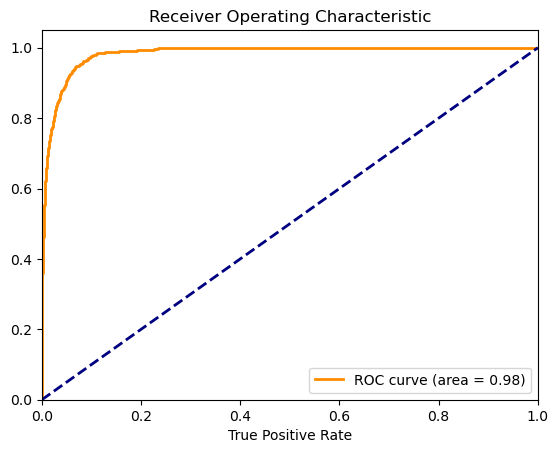

In [ ]:
plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=2,label='ROC curve (area = %0.2f)' % area)
plt.plot([0,1],[0,1],color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Model Evaluation : Rankordering, KS statistic, Gini coeff

In [ ]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    "Default Truth": y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
19205,0,0.516
15514,0,0.000
30367,0,0.006


In [ ]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'],10,labels=False, duplicates='drop')
df_eval.head()

,Default Truth,Default Probability,Decile
19205,0,0.516,8
15514,0,0.000,2
30367,0,0.006,6
35347,0,0.006,6
41814,1,0.912,9


In [ ]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count   1250.000
mean       0.483
std        0.182
min        0.213
25%        0.319
50%        0.466
75%        0.638
max        0.819
Name: Default Probability, dtype: float64

In [ ]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),
}))
df_decile.reset_index(inplace=True)
df_decile

/var/folders/3z/cdhq61mj2k79_p504t1jqryr0000gn/T/ipykernel_6539/482895170.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1249.000
3,3,0.000,0.000,0.000,1250.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.004,0.000,1249.000
6,6,0.004,0.028,2.000,1248.000
7,7,0.028,0.213,13.000,1236.000
8,8,0.213,0.819,159.000,1091.000
9,9,0.819,1.000,900.000,350.000


In [ ]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1249.000,0.000,100.000
3,3,0.000,0.000,0.000,1250.000,0.000,100.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
5,5,0.001,0.004,0.000,1249.000,0.000,100.000
6,6,0.004,0.028,2.000,1248.000,0.160,99.840
7,7,0.028,0.213,13.000,1236.000,1.041,98.959
8,8,0.213,0.819,159.000,1091.000,12.720,87.280
9,9,0.819,1.000,900.000,350.000,72.000,28.000


In [ ]:
df_decile.sort_values(by='Decile', ascending=False,inplace=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
9,9,0.819,1.000,900.000,350.000,72.000,28.000
8,8,0.213,0.819,159.000,1091.000,12.720,87.280
7,7,0.028,0.213,13.000,1236.000,1.041,98.959
6,6,0.004,0.028,2.000,1248.000,0.160,99.840
5,5,0.001,0.004,0.000,1249.000,0.000,100.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
3,3,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1249.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
0,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [ ]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
9,9,0.819,1.000,900.000,350.000,72.000,28.000,900.000,350.000
8,8,0.213,0.819,159.000,1091.000,12.720,87.280,1059.000,1441.000
7,7,0.028,0.213,13.000,1236.000,1.041,98.959,1072.000,2677.000
6,6,0.004,0.028,2.000,1248.000,0.160,99.840,1074.000,3925.000
5,5,0.001,0.004,0.000,1249.000,0.000,100.000,1074.000,5174.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000
3,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000
2,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000
0,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000


In [ ]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
9,9,0.819,1.000,900.000,350.000,72.000,28.000,900.000,350.000,83.799,3.064
8,8,0.213,0.819,159.000,1091.000,12.720,87.280,1059.000,1441.000,98.603,12.615
7,7,0.028,0.213,13.000,1236.000,1.041,98.959,1072.000,2677.000,99.814,23.435
6,6,0.004,0.028,2.000,1248.000,0.160,99.840,1074.000,3925.000,100.000,34.361
5,5,0.001,0.004,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295
4,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237
3,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180
2,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114
1,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057
0,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000


In [ ]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
9,9,0.819,1.000,900.000,350.000,72.000,28.000,900.000,350.000,83.799,3.064,80.735
8,8,0.213,0.819,159.000,1091.000,12.720,87.280,1059.000,1441.000,98.603,12.615,85.988
7,7,0.028,0.213,13.000,1236.000,1.041,98.959,1072.000,2677.000,99.814,23.435,76.379
6,6,0.004,0.028,2.000,1248.000,0.160,99.840,1074.000,3925.000,100.000,34.361,65.639
5,5,0.001,0.004,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295,54.705
4,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237,43.763
3,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180,32.820
2,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114,21.886
1,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057,10.943
0,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000,0.000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [ ]:
gini_coefficient = 2*area-1


print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9837749347872266
Gini Coefficient: 0.9675498695744531


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

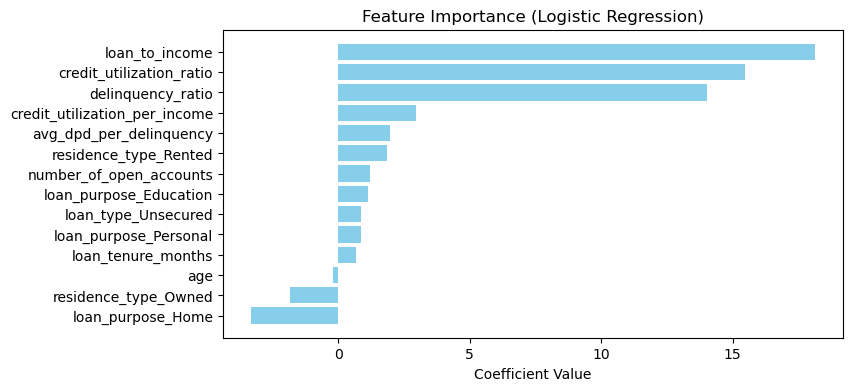

In [ ]:
final_model = best_model_logistic
feature_importance = final_model.coef_[0]
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8,4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression)')
plt.show()

In [ ]:
!pip install bayesian-optimization scikit-learn

126813.99s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [bayesian-optimization]


In [ ]:
from bayes_opt import BayesianOptimization

In [ ]:
# Define the function to optimize
def optimize_log_reg(C, max_iter):
    model = LogisticRegression(C=C, max_iter=int(max_iter), solver='liblinear')
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='roc_auc')
    # We want to maximize the AUC-ROC score
    return scores.mean()

In [ ]:
# Define the parameter space
param_bounds = {
    'C': (0.001, 10.0),
    'max_iter': (50, 500)
}

In [ ]:
# Initialize the Bayesian optimizer
optimizer = BayesianOptimization(
    f=optimize_log_reg,
    pbounds=param_bounds,
    random_state=42
)

In [ ]:
optimizer.maximize(init_points=5,n_iter=50)

|   iter    |  target   |     C     | max_iter  |
-------------------------------------------------
| 31        | 0.9827363 | 8.6491946 | 392.41652 |
| 32        | 0.9827360 | 8.7008035 | 120.39670 |
| 33        | 0.9818671 | 0.5277975 | 135.90025 |
| 34        | 0.9827345 | 8.1581128 | 235.90080 |
| 35        | 0.9827339 | 7.2512514 | 213.82698 |
| 36        | 0.9824396 | 1.1844947 | 348.67081 |
| 37        | 0.9820133 | 0.6165262 | 499.28036 |
| 38        | 0.9827379 | 9.9318976 | 485.41170 |
| 39        | 0.9827338 | 8.0885026 | 224.76106 |
| 40        | 0.9804657 | 0.2113286 | 230.50010 |
| 41        | 0.9786584 | 0.1077157 | 70.001051 |
| 42        | 0.9827381 | 10.0      | 57.982195 |
| 43        | 0.9827380 | 9.9716521 | 83.447626 |
| 44        | 0.9826660 | 2.7605925 | 170.86743 |
| 45        | 0.9823818 | 1.0329591 | 180.03098 |
| 46        | 0.9827326 | 6.7014949 | 338.26726 |
| 47        | 0.9826070 | 1.9626188 | 329.71759 |
| 48        | 0.9827381 | 9.6457351 | 245.05080 |


In [ ]:
best_params = optimizer.max['params']
best_params['max_iter'] = int(best_params['max_iter'])

In [ ]:
final_model = LogisticRegression(**best_params, solver='liblinear')
final_model.fit(X_train_encoded, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,np.float64(9.85549848051843)
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,99
,multi_class,'deprecated'


In [ ]:
y_pred = final_model.predict(X_test_encoded)
y_prob = final_model.predict_proba(X_test_encoded)[:,1]

In [84]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11423
           1       0.56      0.98      0.71      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.95      0.84     12497
weighted avg       0.96      0.93      0.94     12497



In [85]:
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))

AUC-ROC Score: 0.9527432973201997


In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
# Define the parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
) 

In [89]:
# Fit GridSearchCV
grid_search.fit(X_train_encoded, y_train)

/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [09:25:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1768314084485/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [09:25:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1768314084485/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [09:25:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1768314084485/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [09:25:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboo

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 0.9, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], 'n_estimators': [50, 100, ...], ...}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [90]:
best_params = grid_search.best_params_
best_params

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 0.8}

In [93]:
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test_encoded)
y_prob = best_xgb_model.predict_proba(X_test_encoded)[:,1]

print(" roc score :", roc_auc_score(y_test,y_prob))

 roc score : 0.988660370440832


In [94]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.85      0.76      0.80      1074

    accuracy                           0.97     12497
   macro avg       0.91      0.87      0.89     12497
weighted avg       0.97      0.97      0.97     12497



In [96]:
!pip install shap

In [98]:
import shap
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X_test_encoded)

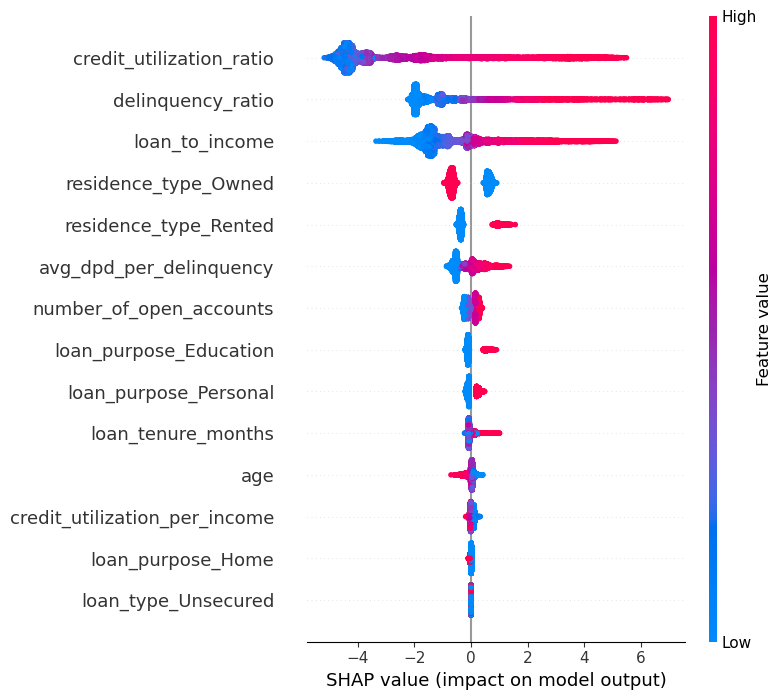

In [99]:
shap.summary_plot(shap_values,X_test_encoded)

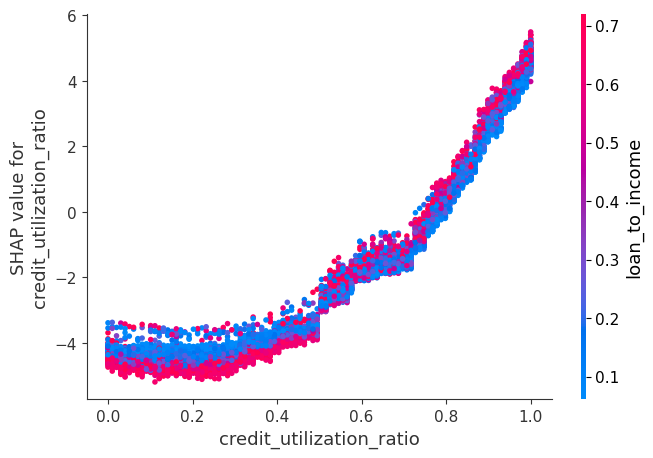

In [104]:
# Dependence plot for a specific feature
shap.dependence_plot("credit_utilization_ratio", shap_values, X_test_encoded)

In [105]:
# plot for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_encoded.iloc[0,:])